In [19]:
import pandas as pd
import ujson
import json
import constants
import pickle as pckl
json_surah_words = 'json-surah-words/'

In [2]:
# surah_df = pd.read_json(json_surah_words + '1.json')
# for i in range(2, 115):
#     cur_df = pd.read_json(json_surah_words + str(i) + '.json')
#     surah_df = pd.concat([surah_df, cur_df], ignore_index=True)
#     print(len(surah_df))


In [20]:
fh = open("surah_df.pckl","rb")
surah_df = pckl.load(fh)
fh.close()
surah_df.head(5)

,answer,arabicAyah,ayahnum,frequency,hasRootWord,pcklId,question,question_id,rootWord,rootWordId,rootWordType,surahayahnum,surahnum,tlit,wazn,waznEnglish,waznFreq,waznTlit,waznType,wordnum
0,(of) those,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْر...,7,1464,True,0,الَّذِينَ,981575111091,ٱلَّذِى,59,nominal,1007002,1,alladhīna,ٱلَّذِى,"who, which, that",1464,alladhī,Nominal (Relative pronoun),2
1,(of) Allah,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,1,2851,True,147,اللَّهِ,748891323231,أ ل ه,61,triliteral root,1001002,1,l-lahi,ٱللَّه,Allah,2699,allah,Proper noun,2
2,(be) to Allah,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,2851,True,148,لِلَّهِ,338108719184,أ ل ه,61,triliteral root,1002002,1,lillahi,ٱللَّه,Allah,2699,allah,Proper noun,2
3,All praises and thanks,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,63,True,1,الْحَمْدُ,787905890794,ح م د,352,triliteral root,1002001,1,al-ḥamdu,حَمْد,False,43,ḥamd,Noun,1
4,(of the) Judgment,مَالِكِ يَوْمِ الدِّينِ,4,101,True,2,الدِّينِ,335755371025,د ي ن,498,triliteral root,1004003,1,l-dīni,دِين,False,92,dīn,Noun,3


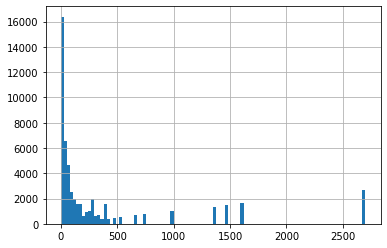

In [21]:
# surah_df[['ayahnum', 'frequency', 'rootWordId', 'tlit', 'waznType']]
df = surah_df[['rootWordId', 'waznEnglish', 'waznFreq', 'waznTlit', 'waznType']].copy(deep=True)

df['waznFreq'].hist(bins=100)

In [70]:
row = surah_df.loc[(surah_df['surahnum'] == 1) & (surah_df['ayahnum'] == 5)]
row

,answer,arabicAyah,ayahnum,frequency,hasRootWord,pcklId,question,question_id,rootWord,rootWordId,...,surahayahnum,surahnum,tlit,wazn,waznEnglish,waznFreq,waznTlit,waznType,wordnum,waznId
14,we worship,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,5,275,True,0,نَعْبُدُ,381352820716,ع ب د,948,...,1005002,1,naʿbudu,عَبَدَ,to worship,122,ʿabada,Verb (form I),2,ʿabada122
16,we ask for help,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,5,11,True,4,نَسْتَعِينُ,113176584047,ع و ن,1041,...,1005004,1,nastaʿīnu,ٱسْتَعِينُ,to seek help,4,is'taʿīnu,Verb (form X),4,is'taʿīnu4


In [22]:
import numpy as np
df = df.drop_duplicates(['waznFreq', 'waznTlit'])
df["waznId"] = df["waznTlit"] + df["waznFreq"].astype(str)
df.head(20)

,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId
0,59,"who, which, that",1464,alladhī,Nominal (Relative pronoun),alladhī1464
1,61,Allah,2699,allah,Proper noun,allah2699
3,352,False,43,ḥamd,Noun,ḥamd43
4,498,False,92,dīn,Noun,dīn92
5,524,False,975,rabb,Noun,rabb975
6,544,False,57,raḥmān,Nominal (Adjective),raḥmān57
8,544,False,116,raḥīm,Nominal (Adjective),raḥīm116
10,726,False,39,is'm,Noun,is'm39
11,836,False,45,ṣād rā ṭā,Noun,ṣād rā ṭā45
13,891,False,14,ḍāll,Active participle (Noun),ḍāll14


In [23]:
with open('outputs/word-scores.json') as f:
    data = json.load(f)
data

{"(59, 'alladhī')": 206.2933827344372,
 "(61, 'allah')": 846.3059313215401,
 "(352, 'ḥamd')": 14.04786680541103,
 "(498, 'dīn')": 53.97412199091571,
 "(524, 'rabb')": 316.85744016649323,
 "(544, 'raḥmān')": 38.46153846153847,
 "(544, 'raḥīm')": 74.01247401247402,
 '(726, "is\'m")': 12.79916753381894,
 "(836, 'ṣād rā ṭā')": 26.802218111927324,
 "(891, 'ḍāll')": 2.036094401147428,
 "(948, 'ʿabada')": 160.99585062240664,
 "(1016, 'ʿālamīn')": 22.99687825182102,
 '(1041, "is\'taʿīnu")': 5.809128630705394,
 "(1067, 'maghḍūb')": 0.23137436376675322,
 "(1095, 'ghayr')": 20.59231837524104,
 '(1246, "mus\'taqīm")': 21.626617373072392,
 "(1415, 'mālik')": 2.957486136488532,
 "(1492, 'anʿama')": 2.4525682559275843,
 "(1547, 'hadā')": 80.22181145225143,
 "(1664, 'yā wāw mīm')": 227.54158962608645,
 "(1, 'ādam')": 1.060459991630644,
 "(5, 'hamza bā dāl')": 2.9921795316691946,
 '(6, "ib\'rāhīm")': 1.3475685176746306,
 '(9, "ib\'līs")': 0.38190024287468505,
 "(10, 'ābā')": 0.6749078895216875,
 "(11, 

In [24]:
df['score'] = 0
for i in range(len(df)):
    word_id = df.iloc[i,0]
    wazn_tlit = df.iloc[i,3]
    if '\'' in wazn_tlit:
        key = '(' + str(word_id) + ', "' + wazn_tlit + '")'
    else:
        key = "(" + str(word_id) + ", '" + wazn_tlit + "')"
    df.iloc[i,6] = data[key]
df = df.sort_values(by='score', ascending=False)
df

,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId,score
1,61,Allah,2699,allah,Proper noun,allah2699,846.305931
5,524,False,975,rabb,Noun,rabb975,316.857440
23,1664,False,405,yā wāw mīm,Nominal (Noun),yā wāw mīm405,227.541590
0,59,"who, which, that",1464,alladhī,Nominal (Relative pronoun),alladhī1464,206.293383
3111,1245,to say,1618,qāla,Verb (form I),qāla1618,166.678001
...,...,...,...,...,...,...,...
1449,330,False,2,ḥāḍirat,Active participle (Adjective),ḥāḍirat2,0.001156
3074,1199,False,2,aqsaṭ,Noun,aqsaṭ2,0.001156
1733,498,to contract,1,tadāyan,Verb (form VI),tadāyan1,0.001156
1723,494,to carry out,1,tudīru,Verb (form IV),tudīru1,0.000578


In [25]:
verb_df = df.copy(deep=True)
mask = df['waznType'].str.contains('Verb ()')
verb_df = df[mask]
other_df = df.copy(deep=True)
other_df = df[~mask]
other_df.head(20)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId,score
1,61,Allah,2699,allah,Proper noun,allah2699,846.305931
5,524,False,975,rabb,Noun,rabb975,316.857440
23,1664,False,405,yā wāw mīm,Nominal (Noun),yā wāw mīm405,227.541590
0,59,"who, which, that",1464,alladhī,Nominal (Relative pronoun),alladhī1464,206.293383
3314,1256,False,260,kitāb,Noun,kitāb260,82.206035
8,544,False,116,raḥīm,Nominal (Adjective),raḥīm116,74.012474
265,32,"the Earth, land",461,hamza rā ḍād,Noun,hamza rā ḍād461,65.016196
777,63,"to, toward, until",742,ilā,Preposition,ilā742,58.682635
219,27,when,409,idhā,Nominal (Time adverb),idhā409,58.260065
4,498,False,92,dīn,Noun,dīn92,53.974122


In [26]:
prep_df = df.copy(deep=True)
mask = df['waznType'].str.contains('Proper')
prep_df = df[mask]
prep_df

,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId,score
1,61,Allah,2699,allah,Proper noun,allah2699,846.305931
44195,1415,False,1,mālik,Proper noun,mālik1,2.957486
2197,776,False,88,shīn ṭā nūn,Nominal (Proper noun),shīn ṭā nūn88,2.261712
293,41,Israel,43,is'rāīl,Proper noun,is'rāīl43,1.776615
11592,64,Elijah,3,il'yās,Proper noun,il'yās3,1.663586
30,6,Ibrahim,69,ib'rāhīm,Proper noun,ib'rāhīm69,1.347569
14624,854,False,9,ṣāliḥ,Proper noun,ṣāliḥ9,1.280203
53179,34,Iram,1,iram,Proper noun,iram1,1.244813
47199,778,False,1,shiʿ'rā,Proper noun,shiʿ'rā1,1.244813
24,1,Adam,25,ādam,Proper noun,ādam25,1.060460


In [27]:
verb_df = verb_df.sort_values(by='score', ascending=False)
other_df['row'] = np.arange(float(len(other_df)))
verb_df['row'] = np.arange(float(len(verb_df)))
verb_df.head(21)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId,score,row
3111,1245,to say,1618,qāla,Verb (form I),qāla1618,166.678001,0.0
14,948,to worship,122,ʿabada,Verb (form I),ʿabada122,160.995851,1.0
3475,1305,to be,1358,kāna,Verb (form I),kāna1358,84.715079,2.0
22,1547,to guide,144,hadā,Verb (form I),hadā144,80.221811,3.0
856,75,to believe,537,āmana,Verb (form IV),āmana537,55.389323,4.0
73,12,to give,271,ātā,Verb (form IV),ātā271,37.899121,5.0
3387,1280,to disbelieve,289,kafara,Verb (form I),kafara289,29.751785,6.0
3758,1460,"to send down, to reveal",183,anzala,Verb (form IV),anzala183,28.995315,7.0
2217,789,"to be grateful, to give thanks",46,shakara,Verb (form I),shakara46,26.247689,8.0
1852,536,to return,79,rajaʿa,Verb (form I),rajaʿa79,25.702393,9.0


In [28]:
verb_df['level'] = 0
verb_df.iloc[:140,8] = (np.ceil(verb_df['row'] / 7) * 7) / 7
verb_df.iloc[:140,8] = verb_df.iloc[:140,8].astype(int)
verb_df.iloc[140:,8] = (np.ceil(verb_df['row'] / 20) * 20) / 20
verb_df.iloc[140:,8] = verb_df.iloc[140:,8].astype(int)
verb_df.head(21)

,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId,score,row,level
3111,1245,to say,1618,qāla,Verb (form I),qāla1618,166.678001,0.0,0.0
14,948,to worship,122,ʿabada,Verb (form I),ʿabada122,160.995851,1.0,1.0
3475,1305,to be,1358,kāna,Verb (form I),kāna1358,84.715079,2.0,1.0
22,1547,to guide,144,hadā,Verb (form I),hadā144,80.221811,3.0,1.0
856,75,to believe,537,āmana,Verb (form IV),āmana537,55.389323,4.0,1.0
73,12,to give,271,ātā,Verb (form IV),ātā271,37.899121,5.0,1.0
3387,1280,to disbelieve,289,kafara,Verb (form I),kafara289,29.751785,6.0,1.0
3758,1460,"to send down, to reveal",183,anzala,Verb (form IV),anzala183,28.995315,7.0,1.0
2217,789,"to be grateful, to give thanks",46,shakara,Verb (form I),shakara46,26.247689,8.0,2.0
1852,536,to return,79,rajaʿa,Verb (form I),rajaʿa79,25.702393,9.0,2.0


In [29]:
other_df['level'] = 0
other_df.iloc[:140,8] = (np.ceil(other_df['row'] / 7) * 7) / 7
other_df.iloc[:140,8] = other_df.iloc[:140,8].astype(int)
other_df.iloc[140:,8] = (np.ceil(other_df['row'] / 20) * 20) / 20
other_df.iloc[140:,8] = other_df.iloc[140:,8].astype(int)
other_df

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,rootWordId,waznEnglish,waznFreq,waznTlit,waznType,waznId,score,row,level
1,61,Allah,2699,allah,Proper noun,allah2699,846.305931,0.0,0.0
5,524,False,975,rabb,Noun,rabb975,316.857440,1.0,1.0
23,1664,False,405,yā wāw mīm,Nominal (Noun),yā wāw mīm405,227.541590,2.0,1.0
0,59,"who, which, that",1464,alladhī,Nominal (Relative pronoun),alladhī1464,206.293383,3.0,1.0
3314,1256,False,260,kitāb,Noun,kitāb260,82.206035,4.0,1.0
...,...,...,...,...,...,...,...,...,...
31187,31,physical desire,1,ir'bat,Noun,ir'bat1,0.001849,3197.0,160.0
31538,435,False,1,khumur,Noun,khumur1,0.001849,3198.0,160.0
2335,843,False,3,ṣaghīr,Noun,ṣaghīr3,0.001734,3199.0,160.0
1449,330,False,2,ḥāḍirat,Active participle (Adjective),ḥāḍirat2,0.001156,3200.0,160.0


In [30]:
verb_levels=verb_df[['waznId', 'level']].copy(deep=True)
t1=verb_levels.head()
verb_levels

,waznId,level
3111,qāla1618,0.0
14,ʿabada122,1.0
3475,kāna1358,1.0
22,hadā144,1.0
856,āmana537,1.0
...,...,...
3797,nunshizu1,74.0
2012,sīn hamza mīm3,74.0
1733,tadāyan1,74.0
1723,tudīru1,74.0


In [31]:
other_levels=other_df[['waznId', 'level']].copy(deep=True)
other_t1=other_levels.head()
other_levels

,waznId,level
1,allah2699,0.0
5,rabb975,1.0
23,yā wāw mīm405,1.0
0,alladhī1464,1.0
3314,kitāb260,1.0
...,...,...
31187,ir'bat1,160.0
31538,khumur1,160.0
2335,ṣaghīr3,160.0
1449,ḥāḍirat2,160.0


In [32]:
surah_df['waznId'] = surah_df["waznTlit"] + surah_df["waznFreq"].astype(str)
t2=surah_df.head()

In [20]:
t1

,waznId,level
3111,qāla1618,0.0
14,ʿabada122,1.0
3475,kāna1358,1.0
22,hadā144,1.0
856,āmana537,1.0


In [21]:
t2

,answer,arabicAyah,ayahnum,frequency,hasRootWord,pcklId,question,question_id,rootWord,rootWordId,...,surahayahnum,surahnum,tlit,wazn,waznEnglish,waznFreq,waznTlit,waznType,wordnum,waznId
0,(of) those,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْر...,7,1464,True,0,الَّذِينَ,981575111091,ٱلَّذِى,59,...,1007002,1,alladhīna,ٱلَّذِى,"who, which, that",1464,alladhī,Nominal (Relative pronoun),2,alladhī1464
1,(of) Allah,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,1,2851,True,147,اللَّهِ,748891323231,أ ل ه,61,...,1001002,1,l-lahi,ٱللَّه,Allah,2699,allah,Proper noun,2,allah2699
2,(be) to Allah,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,2851,True,148,لِلَّهِ,338108719184,أ ل ه,61,...,1002002,1,lillahi,ٱللَّه,Allah,2699,allah,Proper noun,2,allah2699
3,All praises and thanks,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,63,True,1,الْحَمْدُ,787905890794,ح م د,352,...,1002001,1,al-ḥamdu,حَمْد,False,43,ḥamd,Noun,1,ḥamd43
4,(of the) Judgment,مَالِكِ يَوْمِ الدِّينِ,4,101,True,2,الدِّينِ,335755371025,د ي ن,498,...,1004003,1,l-dīni,دِين,False,92,dīn,Noun,3,dīn92


In [55]:
morpheme_df.head(20)

,surahnum,ayahnum,wordnum,morphemeEnglishList,morphemeArabicList,seg_count
0,1,1,1,"[[P, segRust, prefixed preposition bi], [N, se...",[جار ومجرور],2
1,1,1,2,"[[PN, segBlue, genitive proper noun → Allah]]",[لفظ الجلالة مجرور],1
2,1,1,3,"[[ADJ, segPurple, genitive masculine singular ...",[صفة مجرورة],1
3,1,1,4,"[[ADJ, segPurple, genitive masculine singular ...",[صفة مجرورة],1
4,1,2,1,"[[N, segSky, nominative masculine noun]]",[اسم مرفوع],1
5,1,2,2,"[[P, segRust, prefixed preposition lām], [PN, ...",[جار ومجرور],2
6,1,2,3,"[[N, segSky, genitive masculine noun]]",[اسم مجرور],1
7,1,2,4,"[[N, segSky, genitive masculine plural noun]]",[اسم مجرور],1
8,1,3,1,"[[ADJ, segPurple, genitive masculine singular ...",[صفة مجرورة],1
9,1,3,2,"[[ADJ, segPurple, genitive masculine singular ...",[صفة مجرورة],1


In [72]:
fh = open("morphemes_segcount.pckl","rb")
morpheme_df = pckl.load(fh)
fh.close()
morph_dict = dict()
for i in range(len(morpheme_df)):
    row = morpheme_df.iloc[i]
    match_row = surah_df.loc[(surah_df['surahnum'] == row['surahnum']) &
                             (surah_df['ayahnum'] == row['ayahnum']) &
                             (surah_df['wordnum'] == row['wordnum'])]
    if len(match_row) is 0:
        continue
    wazn_id = match_row['waznId'].values
    wazn_id = wazn_id[0]
    if wazn_id in morph_dict:
        avg, total = morph_dict.get(wazn_id)
        curr = row['seg_count']
        new_avg = ((avg * total) + curr) / (total + 1)
        total += 1
        morph_dict[wazn_id] = (new_avg, total)
    else:
        morph_dict[wazn_id] = (row['seg_count'], 1)
morph_dict

{"is'm39": (1.4615384615384615, 39),
 'allah2699': (1.2152649129307111, 2699),
 'raḥmān57': (1.2105263157894737, 57),
 'raḥīm116': (1.0, 116),
 'ḥamd43': (1.5116279069767442, 43),
 'rabb975': (2.010256410256411, 975),
 'ʿālamīn73': (1.164383561643836, 73),
 'mālik3': (1.0, 3),
 'yā wāw mīm405': (1.2567901234567906, 405),
 'dīn92': (1.3913043478260876, 92),
 'ʿabada122': (2.1065573770491794, 122),
 "is'taʿīnu4": (2.0, 4),
 'hadā144': (1.8472222222222223, 144),
 'ṣād rā ṭā45': (1.044444444444444, 45),
 "mus'taqīm37": (1.0, 37),
 'alladhī1464': (1.2199453551912558, 1464),
 'anʿama17': (1.7647058823529411, 17),
 'ghayr147': (1.5578231292517009, 147),
 'maghḍūb1': (1, 1),
 'ḍāll14': (1.1428571428571428, 14),
 'kitāb260': (1.1576923076923078, 260),
 'rayb18': (1.0555555555555556, 18),
 'hudan85': (1.388235294117647, 85),
 'muttaqīn49': (1.4081632653061225, 49),
 'āmana537': (1.9422718808193669, 537),
 'ghayb49': (1.3061224489795922, 49),
 'aqāma54': (2.4629629629629624, 54),
 'ṣalat83': (1.2

In [41]:
swl_verb = surah_df.merge(verb_levels).copy(deep=True)

swl_verb = swl_verb.drop_duplicates(['waznId', 'tlit', 'waznEnglish', 'question'])
swl_verb = swl_verb.drop_duplicates(['tlit'])
swl_verb = swl_verb.sort_values(by='level', ascending=True)
for i in range(len(swl_verb) - 15):
    row = swl_verb.iloc[i]
    word_id = row['rootWordId']
    level = row['level']
    next_levels = swl_verb.loc[(swl_verb['level'] == (level + 1)) | (swl_verb['level'] == (level + 2))]
    common = next_levels.loc[next_levels['rootWordId'] == word_id]
    if len(common) > 0:
        print('level is ' + str(level))
        print(word_id)
        print(common['level'])
swl_verb.head(50)
# len(swl)

level is 4.0
835    6.0
Name: level, dtype: float64
level is 6.0
19045    8.0
Name: level, dtype: float64
level is 6.0
16508    8.0
17588    8.0
Name: level, dtype: float64
level is 8.0
19324    10.0
Name: level, dtype: float64
level is 9.0
15495    10.0
Name: level, dtype: float64
level is 9.0
16100    11.0
Name: level, dtype: float64
level is 9.0
19340    10.0
Name: level, dtype: float64
level is 10.0
4430    12.0
Name: level, dtype: float64
level is 10.0
17900    11.0
Name: level, dtype: float64
level is 11.0
18904    13.0
Name: level, dtype: float64
level is 11.0
16564    13.0
Name: level, dtype: float64
level is 14.0
6413    16.0
Name: level, dtype: float64
level is 14.0
14353    15.0
Name: level, dtype: float64
level is 15.0
13706    16.0
Name: level, dtype: float64
level is 16.0
19098    17.0
Name: level, dtype: float64
level is 16.0
19310    18.0
Name: level, dtype: float64
level is 18.0
16512    19.0
Name: level, dtype: float64
level is 19.0
6269    20.0
Name: level, dtype: fl

,answer,arabicAyah,ayahnum,frequency,hasRootWord,pcklId,question,question_id,rootWord,rootWordId,...,surahnum,tlit,wazn,waznEnglish,waznFreq,waznTlit,waznType,wordnum,waznId,level
9446,say,وَمِنَ النَّاسِ مَنْ يَقُولُ آمَنَّا بِاللَّه...,8,1722,True,0,يَقُولُ,989964453617,ق و ل,1245,...,2,yaqūlu,قَالَ,to say,1618,qāla,Verb (form I),4,qāla1618,0.0
0,we worship,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,5,275,True,0,نَعْبُدُ,381352820716,ع ب د,948,...,1,naʿbudu,عَبَدَ,to worship,122,ʿabada,Verb (form I),2,ʿabada122,1.0
11539,disbelieve[d],إِنَّ الَّذِينَ كَفَرُوا سَوَاءٌ عَلَيْهِمْ أ...,6,525,True,0,كَفَرُوا,460497945441,ك ف ر,1280,...,2,kafarū,كَفَرَ,to disbelieve,289,kafara,Verb (form I),3,kafara289,1.0
11930,they used to,وَلَهُمْ عَذَابٌ أَلِيمٌ بِمَا كَانُوا يَكْذِ...,10,1390,True,0,كَانُوا,64453680007,ك و ن,1305,...,2,kānū,كَانَ,to be,1358,kāna,Verb (form I),11,kāna1358,1.0
564,and give,وَأَقِيمُوا الصَّلَاةَ وَآتُوا الزَّكَاةَ وَا...,43,549,True,264,وَآتُوا,251222758153,أ ت ي,12,...,2,waātū,آتَى,to give,271,ātā,Verb (form IV),3,ātā271,1.0
1317,believe,الَّذِينَ يُؤْمِنُونَ بِالْغَيْبِ وَيُقِيمُون...,3,879,True,20,يُؤْمِنُونَ,361706381569,أ م ن,75,...,2,yu'minūna,ءَامَنَ,to believe,537,āmana,Verb (form IV),2,āmana537,1.0
13966,(is) sent down,وَالَّذِينَ يُؤْمِنُونَ بِمَا أُنْزِلَ إِلَيْكَ,4,293,True,68,أُنْزِلَ,188465572906,ن ز ل,1460,...,2,unzila,أَنزَلَ,"to send down, to reveal",183,anzala,Verb (form IV),4,anzala183,1.0
143,Guide us,اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ,6,316,True,0,اهْدِنَا,827351319883,ه د ي,1547,...,1,ih'dinā,هَدَى,to guide,144,hadā,Verb (form I),1,hadā144,1.0
5314,[they] will not return,صُمٌّ بُكْمٌ عُمْيٌ فَهُمْ لَا يَرْجِعُونَ,18,104,True,0,يَرْجِعُونَ,568131166112,ر ج ع,536,...,2,yarjiʿūna,رَجَعَ,to return,79,rajaʿa,Verb (form I),6,rajaʿa79,2.0
6597,(be) grateful,ثُمَّ عَفَوْنَا عَنْكُمْ مِنْ بَعْدِ ذَٰلِكَ ...,52,75,True,0,تَشْكُرُونَ,557372267844,ش ك ر,789,...,2,tashkurūna,شَكَرَ,"to be grateful, to give thanks",46,shakara,Verb (form I),8,shakara46,2.0


In [43]:
swl_other = surah_df.merge(other_levels).copy(deep=True)
swl_other = swl_other.drop_duplicates(['waznId', 'tlit', 'waznEnglish', 'question'])
swl_other = swl_other.drop_duplicates(['tlit'])
swl_other = swl_other.sort_values(by='level', ascending=True)
swl_other.head(50)

,answer,arabicAyah,ayahnum,frequency,hasRootWord,pcklId,question,question_id,rootWord,rootWordId,...,surahnum,tlit,wazn,waznEnglish,waznFreq,waznTlit,waznType,wordnum,waznId,level
1464,(of) Allah,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,1,2851,True,147,اللَّهِ,748891323231,أ ل ه,61,...,1,l-lahi,ٱللَّه,Allah,2699,allah,Proper noun,2,allah2699,0.0
0,(of) those,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْر...,7,1464,True,0,الَّذِينَ,981575111091,ٱلَّذِى,59,...,1,alladhīna,ٱلَّذِى,"who, which, that",1464,alladhī,Nominal (Relative pronoun),2,alladhī1464,1.0
9187,to you,وَالَّذِينَ يُؤْمِنُونَ بِمَا أُنْزِلَ إِلَيْكَ,4,742,True,0,إِلَيْكَ,510075698869,إِلَىٰ,63,...,2,ilayka,إِلَىٰ,"to, toward, until",742,ilā,Preposition,5,ilā742,1.0
4298,the Lord,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,980,True,0,رَبِّ,508649672593,ر ب ب,524,...,1,rabbi,رَبّ,False,975,rabb,Noun,3,rabb975,1.0
5330,the Most Merciful,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,1,339,True,216,الرَّحِيمِ,594803296629,ر ح م,544,...,1,l-raḥīmi,رَّحِيم,False,116,raḥīm,Nominal (Adjective),4,raḥīm116,1.0
7744,the earth,وَإِذَا قِيلَ لَهُمْ لَا تُفْسِدُوا فِي الْأَ...,11,461,True,0,الْأَرْضِ,277310964762,أ ر ض,32,...,2,l-arḍi,أ ر ض,"the Earth, land",461,hamza rā ḍād,Noun,7,hamza rā ḍād461,1.0
22873,(is) the book,ذَٰلِكَ الْكِتَابُ لَا رَيْبَ فِيهِ هُدًى لِل...,2,319,True,51,الْكِتَابُ,541489202854,ك ت ب,1256,...,2,l-kitābu,كِتَٰب,False,260,kitāb,Noun,2,kitāb260,1.0
5805,(of the) Day,مَالِكِ يَوْمِ الدِّينِ,4,405,True,0,يَوْمِ,558786563036,ي و م,1664,...,1,yawmi,ي و م,False,405,yā wāw mīm,Nominal (Noun),2,yā wāw mīm405,1.0
11063,Our Signs,وَالَّذِينَ كَفَرُوا وَكَذَّبُوا بِآيَاتِنَا ...,39,382,True,0,بِآيَاتِنَا,912895431207,أ ي ي,90,...,2,biāyātinā,أ ي ي,False,382,hamza yā yā,Noun,4,hamza yā yā382,2.0
8305,except,وَمَا يَخْدَعُونَ إِلَّا أَنْفُسَهُمْ وَمَا ي...,9,663,True,0,إِلَّا,892499319435,إِلَّا,58,...,2,illā,إِلَّا,False,663,illā,Particle (Restriction particle),7,illā663,2.0


In [45]:
swl_other.to_csv('nonVerbs.csv', index=False)

In [44]:
swl[['question_id', 'level']]
output = swl.groupby('level').question_id.apply(lambda x: ','.join(map(str, x))).reset_index()
output.loc[:,'question_id'] = output.loc[:, 'question_id'].apply(lambda x: [int(y) for y in x.split(",")])
output.head()

,level,question_id
0,0.0,"[721205197745, 254978174480, 63953482887, 1455..."
1,1.0,"[684993489923, 868500313069, 274137369519, 111..."
2,2.0,"[729223599726, 336208648150, 527764216210, 852..."
3,3.0,"[927658428358, 326292614506, 413857476345, 249..."
4,4.0,"[475869827574, 657445305028, 463187066790, 785..."


In [45]:
levels_dict = []
for index, row in output.iterrows():
    levels_dict.append({"level": row['level'], "question_ids": row['question_id']})
levels_dict

[{'level': 0.0,
  'question_ids': [721205197745,
   254978174480,
   63953482887,
   145533059410,
   91822999341,
   49612433120,
   71380728193,
   490178560239,
   833941507830,
   968296774629,
   120789524898,
   230306235538,
   697111462832,
   384765662131,
   982604683194,
   421291606027,
   886497463819,
   810682568210,
   880171429964,
   790896347946,
   349470373537,
   110997255760,
   86291137196,
   679413031838,
   69191232551,
   858488827988,
   447600764946,
   777727017296,
   912185880580,
   947695878208,
   10327430531,
   13254753033,
   137175317179,
   711832559152,
   224770050401,
   672964310961,
   746260286840,
   820417982646,
   179018380792,
   102218253864,
   487829574329,
   319078977378,
   608273461110,
   902433122514,
   190516894282,
   408429482529,
   430773280567,
   556096068592,
   214289805408,
   757632838629,
   406162242844,
   728402198427,
   156006838448,
   964294341798,
   760028933627,
   792271735689,
   729383660548,
   6895

In [46]:
import ujson
with open("outputs/wazn_levels.json", 'w') as f:
    ujson.dump(levels_dict, f, ensure_ascii=False, indent=4)